In [1]:
import polars as pl
import numpy as np

# 读取数据
data = pl.read_parquet("daily_data.pa")

df = data.sort('open_time').sort("symbol")

df = df.with_columns([
    (pl.col('volume') - pl.col('taker_buy_volume')).alias('taker_sell_volume'),
    (pl.col('quote_volume') - pl.col('taker_buy_quote_volume')).alias('taker_sell_quote_volume'),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return')
])

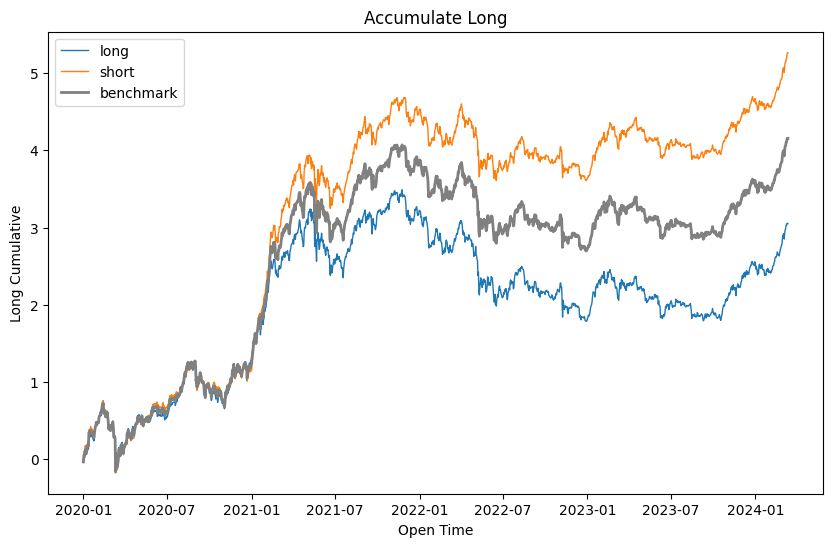

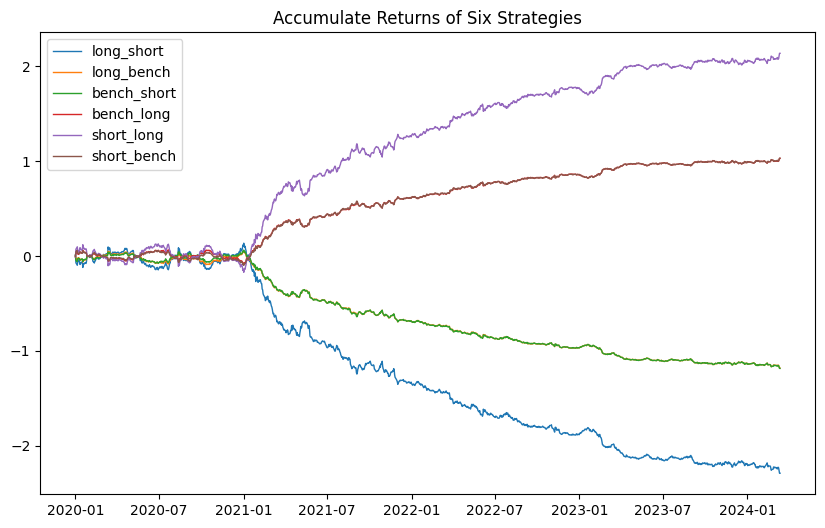

long: 
ann_return = 17.4313  sharpe = 3.8167  maxdd = 0.5018  calmar_ratio = 34.7408  

short: 
ann_return = 30.0749  sharpe = 6.48  maxdd = 0.5312  calmar_ratio = 56.6124  

bench: 
ann_return = 23.7448  sharpe = 5.2089  maxdd = 0.5174  calmar_ratio = 45.8928  

long_short: 
ann_return = -13.0816  sharpe = -10.2646  maxdd = 2.136  calmar_ratio = -6.1244  

long_bench: 
ann_return = -6.7515  sharpe = -10.6389  maxdd = 1.1721  calmar_ratio = -5.76  

bench_long: 
ann_return = 5.8755  sharpe = 9.2585  maxdd = 0.1466  calmar_ratio = 40.089  

short_long: 
ann_return = 12.2056  sharpe = 9.5772  maxdd = 0.2656  calmar_ratio = 45.9612  

short_bench: 
ann_return = 5.8921  sharpe = 9.1282  maxdd = 0.1494  calmar_ratio = 39.4374  

bench_short: 
ann_return = -6.7681  sharpe = -10.4854  maxdd = 1.1736  calmar_ratio = -5.7668  



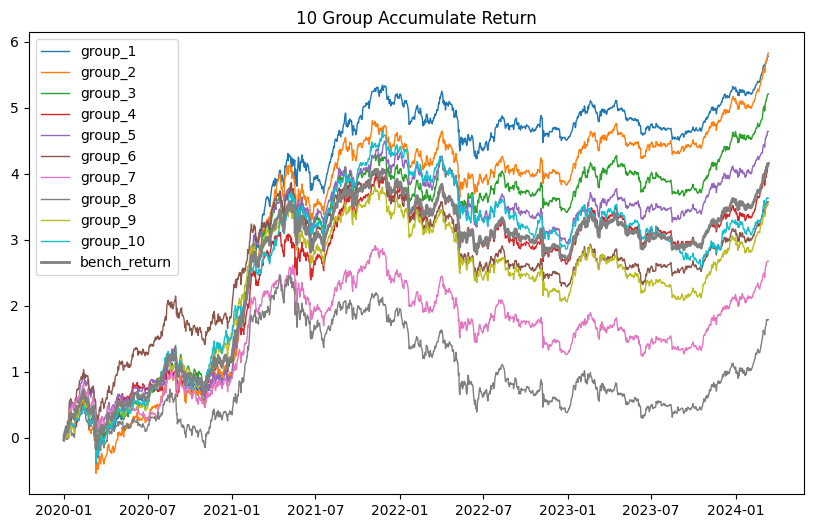

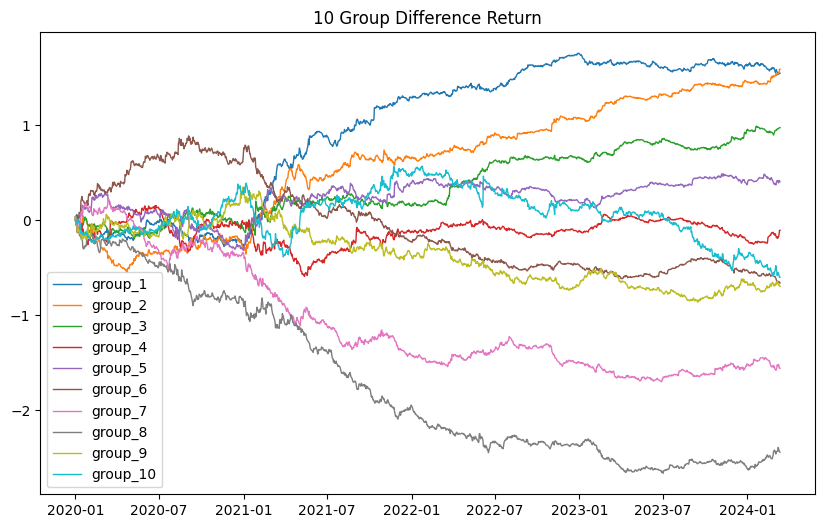

group_1: 
ann_return = 33.0289  sharpe = 7.2018  maxdd = 0.5431  calmar_ratio = 60.8176  

group_2: 
ann_return = 33.2741  sharpe = 6.8568  maxdd = 0.7099  calmar_ratio = 46.8734  

group_3: 
ann_return = 29.7574  sharpe = 6.0554  maxdd = 0.554  calmar_ratio = 53.7091  

group_4: 
ann_return = 23.5815  sharpe = 4.9345  maxdd = 0.5924  calmar_ratio = 39.8065  

group_5: 
ann_return = 26.5071  sharpe = 5.4502  maxdd = 0.4489  calmar_ratio = 59.0487  

group_6: 
ann_return = 20.4081  sharpe = 4.2106  maxdd = 0.4415  calmar_ratio = 46.2241  

group_7: 
ann_return = 15.2724  sharpe = 3.195  maxdd = 0.4572  calmar_ratio = 33.407  

group_8: 
ann_return = 10.2282  sharpe = 2.1106  maxdd = 0.6258  calmar_ratio = 16.3442  

group_9: 
ann_return = 20.21  sharpe = 4.1675  maxdd = 0.4727  calmar_ratio = 42.7522  

group_10: 
ann_return = 20.7467  sharpe = 4.3191  maxdd = 0.588  calmar_ratio = 35.2855  

-----------------------------------------
group_difference_1: 
ann_return = 8.8461  sharpe = 6.

In [2]:
factors = df.select(['open_time', 'symbol', 'taker_buy_quote_volume'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()